In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. 快速了解数据

用pandas加载csv文件

In [2]:
data = pd.read_csv('students_adaptability_level_online_education.csv', encoding='gb2312')

查看数据简单信息

In [3]:
data.describe()

,Num
count,1205.000000
mean,603.000000
std,347.997845
min,1.000000
25%,302.000000
50%,603.000000
75%,904.000000
max,1205.000000


删除课程时长为零的行

In [4]:
data = data.drop(data[data['Class Duration'] == '0'].index)
data

,Num,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3月6日,No,Tab,Moderate
1,2,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1月3日,Yes,Mobile,Moderate
2,3,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1月3日,No,Mobile,Moderate
3,4,Girl,11月15日,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1月3日,No,Mobile,Moderate
5,6,Boy,11月15日,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1月3日,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1201,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1月3日,No,Mobile,Low
1201,1202,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3月6日,No,Mobile,Moderate
1202,1203,Boy,11月15日,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1月3日,No,Mobile,Moderate
1203,1204,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1月3日,No,Mobile,Low


删除部分字段

In [5]:
data = data.drop(columns=['Num', 'Load-shedding'])
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051
unique,2,6,3,2,2,2,3,2,3,2,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Mid,Mobile Data,4G,1月3日,No,Mobile,Moderate
freq,576,328,466,777,763,866,764,586,666,840,843,865,615


修改部分数据

In [6]:
data.loc[data['Age'] == '11月15日', 'Age'] = '11-15'
data.loc[data['Age'] == '6月10日', 'Age'] = '6-10'
data.loc[data['Age'] == '1月5日', 'Age'] = '1-5'
data.loc[data['Class Duration'] == '1月3日', 'Class Duration'] = '1-3'
data.loc[data['Class Duration'] == '3月6日', 'Class Duration'] = '3-6'

检查字段取值范围

In [7]:
print(data['Gender'].unique())

['Boy' 'Girl']


In [8]:
print(data['Age'].unique())

['21-25' '16-20' '11-15' '6-10' '1-5' '26-30']


In [9]:
print(data['Education Level'].unique())

['University' 'College' 'School']


In [10]:
print(data['Institution Type'].unique())

['Non Government' 'Government']


In [11]:
print(data['IT Student'].unique())

['No' 'Yes']


In [12]:
print(data['Location'].unique())

['Yes' 'No']


In [13]:
print(data['Financial Condition'].unique())

['Mid' 'Poor' 'Rich']


In [14]:
print(data['Internet Type'].unique())

['Wifi' 'Mobile Data']


In [15]:
print(data['Network Type'].unique())

['4G' '3G' '2G']


In [16]:
print(data['Class Duration'].unique())

['3-6' '1-3']


In [17]:
print(data['Self Lms'].unique())

['No' 'Yes']


In [18]:
print(data['Device'].unique())

['Tab' 'Mobile' 'Computer']


In [19]:
print(data['Adaptivity Level'].unique())

['Moderate' 'Low' 'High']


In [20]:
data2 = data.copy()


gender = ['Boy', 'Girl']
age = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
education = ['School', 'College', 'University']
institution = ['Government', 'Non Government']
it = ['No', 'Yes']
location = ['No', 'Yes']
finance = ['Poor', 'Mid', 'Rich']
internet = ['Mobile Data', 'Wifi']
network = ['2G', '3G', '4G']
duration = ['1-3', '3-6']
lms = ['No', 'Yes']
device = ['Computer', 'Mobile', 'Tab']
adpt = ['High', 'Moderate', 'Low']

llst = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']
lst = [gender, age, education, institution, it, location, finance, internet, network, duration, lms, device, adpt]


for x, y in zip(llst, lst):
    for i in range(len(y)):
        data2.loc[data2[x] == y[i], x] = i+1


data2.describe()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051
unique,2,6,3,2,2,2,3,2,3,2,2,3,3
top,1,5,1,2,1,2,2,1,3,1,1,2,2
freq,576,328,466,777,763,866,764,586,666,840,843,865,615


<AxesSubplot:>

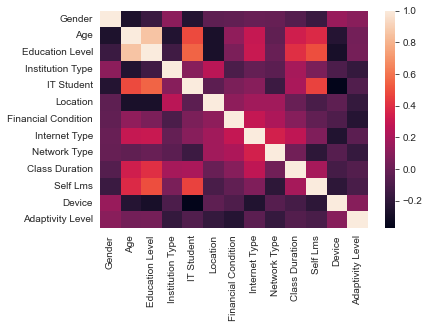

In [21]:
sns.heatmap(data2.astype(int).corr())

2. 数据分析

学生对网课自适应情况

In [22]:
Adaptivity = data.groupby('Adaptivity Level')['Adaptivity Level'].count()
Adaptivity = Adaptivity.reindex(adpt)
print(Adaptivity)

Adaptivity Level
High        100
Moderate    615
Low         336
Name: Adaptivity Level, dtype: int64


学生性别分布

In [23]:
Gender = data.groupby('Gender')['Gender'].count()
print(Gender)

Gender
Boy     576
Girl    475
Name: Gender, dtype: int64


学生年龄分布

In [24]:
Age = data.groupby('Age')['Age'].count()
print(Age)

Age
1-5       78
11-15    319
16-20    244
21-25    328
26-30     45
6-10      37
Name: Age, dtype: int64


学生教育水平分布

In [25]:
Education = data.groupby('Education Level')['Education Level'].count()
print(Education)

Education Level
College       188
School        466
University    397
Name: Education Level, dtype: int64


所在学校是否属于政府

In [26]:
Government = data.groupby('Institution Type')['Institution Type'].count()
print(Government)

Institution Type
Government        274
Non Government    777
Name: Institution Type, dtype: int64


学生是否为IT学生

In [27]:
IT = data.groupby('IT Student')['IT Student'].count()
print(IT)

IT Student
No     763
Yes    288
Name: IT Student, dtype: int64


学生居住处分布(Yes指城市)

In [28]:
Town = data.groupby('Location')['Location'].count()
print(Town)

Location
No     185
Yes    866
Name: Location, dtype: int64


学生经济状况分布

In [29]:
Finance = data.groupby('Financial Condition')['Financial Condition'].count()
print(Finance)

Financial Condition
Mid     764
Poor    204
Rich     83
Name: Financial Condition, dtype: int64


学生上课网络类型

In [30]:
Internet = data.groupby('Internet Type')['Internet Type'].count()
print(Internet)

Internet Type
Mobile Data    586
Wifi           465
Name: Internet Type, dtype: int64


学生网络连接类型

In [31]:
Network = data.groupby('Network Type')['Network Type'].count()
print(Network)

Network Type
2G     17
3G    368
4G    666
Name: Network Type, dtype: int64


课程时长

In [32]:
Duration = data.groupby('Class Duration')['Class Duration'].count()
print(Duration)

Class Duration
1-3    840
3-6    211
Name: Class Duration, dtype: int64


学校是否有自己的学习系统

In [33]:
LMS = data.groupby('Self Lms')['Self Lms'].count()
print(LMS)

Self Lms
No     843
Yes    208
Name: Self Lms, dtype: int64


学生使用的设备分布

In [34]:
Device = data.groupby('Device')['Device'].count()
print(Device)

Device
Computer    156
Mobile      865
Tab          30
Name: Device, dtype: int64


In [35]:
Order = ['High', 'Moderate', 'Low']

自适应程度与性别的关系

In [36]:
# Gender_Adapt = data.loc[data['Adaptivity Level'] == 'High'].groupby('Gender')['Adaptivity Level'].count()
Gender_Adapt = data.groupby(['Gender', 'Adaptivity Level'])['Adaptivity Level'].count()
Gender_Adapt = Gender_Adapt.reindex(Order, level='Adaptivity Level')
print(Gender_Adapt)

Gender  Adaptivity Level
Boy     High                 71
        Moderate            337
        Low                 168
Girl    High                 29
        Moderate            278
        Low                 168
Name: Adaptivity Level, dtype: int64


自适应程度与年龄的关系

In [37]:
Age_Adapt = data.groupby(['Age', 'Adaptivity Level'])['Adaptivity Level'].count()
Age_Adapt = Age_Adapt.reindex(Order, level='Adaptivity Level')
Age_Adapt = Age_Adapt.reindex(age, level='Age')
print(Age_Adapt)

Age    Adaptivity Level
1-5    Moderate             64
       Low                  14
6-10   High                 17
       Moderate             10
       Low                  10
11-15  High                 28
       Moderate            205
       Low                  86
16-20  High                  5
       Moderate            127
       Low                 112
21-25  High                 38
       Moderate            189
       Low                 101
26-30  High                 12
       Moderate             20
       Low                  13
Name: Adaptivity Level, dtype: int64


自适应程度与教育程度的关系

In [38]:
Education_Adapt = data.groupby(['Education Level', 'Adaptivity Level'])['Adaptivity Level'].count()
Education_Adapt = Education_Adapt.reindex(Order, level='Adaptivity Level')
Education_Adapt = Education_Adapt.reindex(education, level='Education Level')
print(Education_Adapt)

Education Level  Adaptivity Level
School           High                 47
                 Moderate            301
                 Low                 118
College          High                  3
                 Moderate             94
                 Low                  91
University       High                 50
                 Moderate            220
                 Low                 127
Name: Adaptivity Level, dtype: int64


自适应程度与学院性质的关系

In [39]:
Government_Adapt = data.groupby(['Institution Type', 'Adaptivity Level'])['Adaptivity Level'].count()
Government_Adapt = Government_Adapt.reindex(Order, level='Adaptivity Level')
print(Government_Adapt)

Institution Type  Adaptivity Level
Government        High                 20
                  Moderate            122
                  Low                 132
Non Government    High                 80
                  Moderate            493
                  Low                 204
Name: Adaptivity Level, dtype: int64


自适应程度与学生是否学习计算机的关系

In [40]:
IT_Adapt = data.groupby(['IT Student', 'Adaptivity Level'])['Adaptivity Level'].count()
IT_Adapt = IT_Adapt.reindex(Order, level='Adaptivity Level')
print(IT_Adapt)

IT Student  Adaptivity Level
No          High                 67
            Moderate            435
            Low                 261
Yes         High                 33
            Moderate            180
            Low                  75
Name: Adaptivity Level, dtype: int64


自适应程度与学生居住地的关系

In [41]:
Location_Adapt = data.groupby(['Location', 'Adaptivity Level'])['Adaptivity Level'].count()
Location_Adapt = Location_Adapt.reindex(Order, level='Adaptivity Level')
print(Location_Adapt)

Location  Adaptivity Level
No        High                  8
          Moderate             83
          Low                  94
Yes       High                 92
          Moderate            532
          Low                 242
Name: Adaptivity Level, dtype: int64


自适应程度与经济情况的关系

In [42]:
Finance_Adapt = data.groupby(['Financial Condition', 'Adaptivity Level'])['Adaptivity Level'].count()
Finance_Adapt = Finance_Adapt.reindex(Order, level='Adaptivity Level')
Finance_Adapt = Finance_Adapt.reindex(finance, level='Financial Condition')
print(Finance_Adapt)

Financial Condition  Adaptivity Level
Poor                 High                 22
                     Moderate             91
                     Low                  91
Mid                  High                 36
                     Moderate            491
                     Low                 237
Rich                 High                 42
                     Moderate             33
                     Low                   8
Name: Adaptivity Level, dtype: int64


自适应程度与网络类型的关系

In [43]:
Internet_Adapt = data.groupby(['Internet Type', 'Adaptivity Level'])['Adaptivity Level'].count()
Internet_Adapt = Internet_Adapt.reindex(Order, level='Adaptivity Level')
print(Internet_Adapt)

Internet Type  Adaptivity Level
Mobile Data    High                 36
               Moderate            367
               Low                 183
Wifi           High                 64
               Moderate            248
               Low                 153
Name: Adaptivity Level, dtype: int64


自适应程度与网络连接的关系

In [44]:
Network_Adapt = data.groupby(['Network Type', 'Adaptivity Level'])['Adaptivity Level'].count()
Network_Adapt = Network_Adapt.reindex(Order, level='Adaptivity Level')
print(Network_Adapt)

Network Type  Adaptivity Level
2G            Moderate              3
              Low                  14
3G            High                 22
              Moderate            203
              Low                 143
4G            High                 78
              Moderate            409
              Low                 179
Name: Adaptivity Level, dtype: int64


自适应程度与课程时长的关系

In [45]:
Duration_Adapt = data.groupby(['Class Duration', 'Adaptivity Level'])['Adaptivity Level'].count()
Duration_Adapt = Duration_Adapt.reindex(Order, level='Adaptivity Level')
print(Duration_Adapt)

Class Duration  Adaptivity Level
1-3             High                 82
                Moderate            468
                Low                 290
3-6             High                 18
                Moderate            147
                Low                  46
Name: Adaptivity Level, dtype: int64


自适应程度与学校是否有学习系统的关系

In [46]:
LMS_Adapt = data.groupby(['Self Lms', 'Adaptivity Level'])['Adaptivity Level'].count()
LMS_Adapt = LMS_Adapt.reindex(Order, level='Adaptivity Level')
print(LMS_Adapt)

Self Lms  Adaptivity Level
No        High                 70
          Moderate            487
          Low                 286
Yes       High                 30
          Moderate            128
          Low                  50
Name: Adaptivity Level, dtype: int64


自适应程度与设备的关系

In [47]:
Device_Adapt = data.groupby(['Device', 'Adaptivity Level'])['Adaptivity Level'].count()
Device_Adapt = Device_Adapt.reindex(Order, level='Adaptivity Level')
print(Device_Adapt)

Device    Adaptivity Level
Computer  High                 30
          Moderate             92
          Low                  34
Mobile    High                 68
          Moderate            497
          Low                 300
Tab       High                  2
          Moderate             26
          Low                   2
Name: Adaptivity Level, dtype: int64


3. 数据可视化

In [48]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

显示学生自适应总体情况

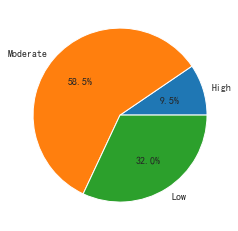

In [49]:
plt.pie(Adaptivity, labels=Order, autopct='%.1f%%')
plt.show()

性别

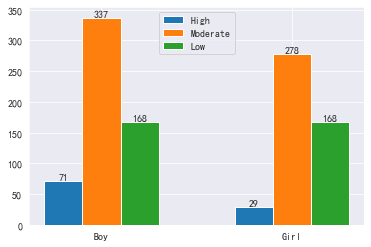

In [76]:
high = [Gender_Adapt['Boy']['High'], Gender_Adapt['Girl']['High']]
moderate = [Gender_Adapt['Boy']['Moderate'], Gender_Adapt['Girl']['Moderate']]
low = [Gender_Adapt['Boy']['Low'], Gender_Adapt['Girl']['Low']]


count = Gender.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=gender)
plt.legend(loc='upper center')
plt.show()


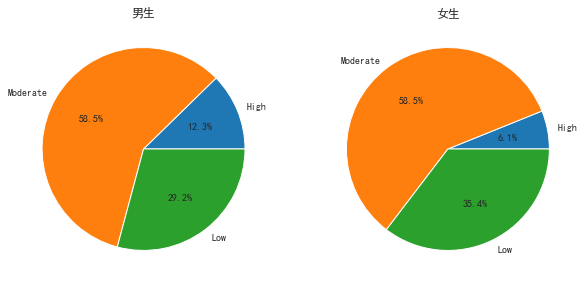

In [51]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
boy = [Gender_Adapt['Boy']['High'], Gender_Adapt['Boy']['Moderate'], Gender_Adapt['Boy']['Low']]
plt.pie(boy, labels=Order, autopct='%1.1f%%')
plt.title("男生")


plt.subplot(122)
girl = [Gender_Adapt['Girl']['High'], Gender_Adapt['Girl']['Moderate'], Gender_Adapt['Girl']['Low']]
plt.pie(girl, labels=Order, autopct='%1.1f%%')
plt.title("女生")

plt.show()

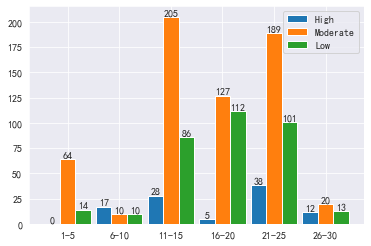

In [52]:
high = [0, Age_Adapt['6-10']['High'], Age_Adapt['11-15']['High'], Age_Adapt['16-20']['High'],
        Age_Adapt['21-25']['High'], Age_Adapt['26-30']['High']]
moderate = [Age_Adapt['1-5']['Moderate'], Age_Adapt['6-10']['Moderate'], Age_Adapt['11-15']['Moderate'], Age_Adapt['16-20']['Moderate'],
            Age_Adapt['21-25']['Moderate'], Age_Adapt['26-30']['Moderate']]
low = [Age_Adapt['1-5']['Low'], Age_Adapt['6-10']['Low'], Age_Adapt['11-15']['Low'], Age_Adapt['16-20']['Low'],
       Age_Adapt['21-25']['Low'], Age_Adapt['26-30']['Low']]


count = Age.count()
width = 0.3
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=age)
plt.legend()
plt.show()

学历

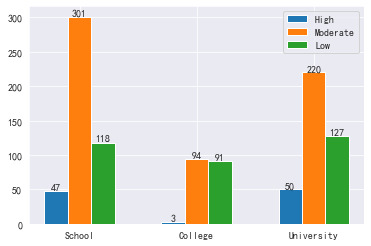

In [53]:
high = [Education_Adapt['School']['High'], Education_Adapt['College']['High'], Education_Adapt['University']['High']]
moderate = [Education_Adapt['School']['Moderate'], Education_Adapt['College']['Moderate'], Education_Adapt['University']['Moderate']]
low = [Education_Adapt['School']['Low'], Education_Adapt['College']['Low'], Education_Adapt['University']['Low']]


count = Education.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=education)
plt.legend()
plt.show()

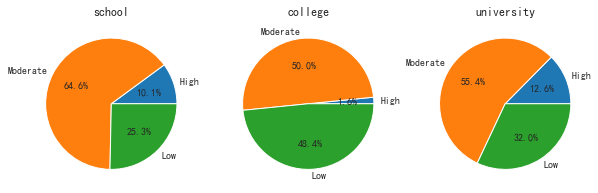

In [54]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
school = [Education_Adapt['School']['High'], Education_Adapt['School']['Moderate'], Education_Adapt['School']['Low']]
plt.pie(school, labels=Order, autopct='%1.1f%%')
plt.title("school")


plt.subplot(132)
college = [Education_Adapt['College']['High'], Education_Adapt['College']['Moderate'], Education_Adapt['College']['Low']]
plt.pie(college, labels=Order, autopct='%1.1f%%')
plt.title("college")


plt.subplot(133)
university = [Education_Adapt['University']['High'], Education_Adapt['University']['Moderate'], Education_Adapt['University']['Low']]
plt.pie(university, labels=Order, autopct='%1.1f%%')
plt.title("university")
plt.show()

学院性质

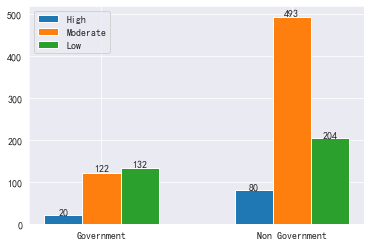

In [55]:
high = [Government_Adapt['Government']['High'], Government_Adapt['Non Government']['High']]
moderate = [Government_Adapt['Government']['Moderate'], Government_Adapt['Non Government']['Moderate']]
low = [Government_Adapt['Government']['Low'], Government_Adapt['Non Government']['Low']]


count = Government.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=institution)
plt.legend()
plt.show()

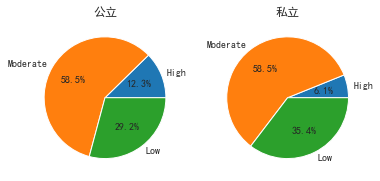

In [56]:
plt.subplot(121)
gov = [Government_Adapt['Government']['High'], Government_Adapt['Government']['Moderate'], Government_Adapt['Government']['Low']]
plt.pie(boy, labels=Order, autopct='%1.1f%%')
plt.title("公立")


plt.subplot(122)
ngov = [Government_Adapt['Non Government']['High'], Government_Adapt['Non Government']['Moderate'], Government_Adapt['Non Government']['Low']]
plt.pie(girl, labels=Order, autopct='%1.1f%%')
plt.title("私立")

plt.show()

是否为计算机学生

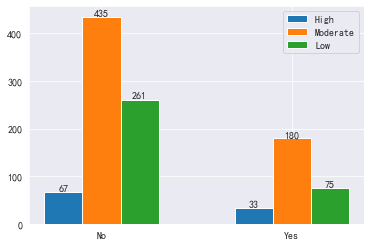

In [57]:
high = [IT_Adapt['No']['High'], IT_Adapt['Yes']['High']]
moderate = [IT_Adapt['No']['Moderate'], IT_Adapt['Yes']['Moderate']]
low = [IT_Adapt['No']['Low'], IT_Adapt['Yes']['Low']]


count = IT.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x + width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i] + width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x + 2 * width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i] + 2 * width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x + width, labels=it)
plt.legend()
plt.show()

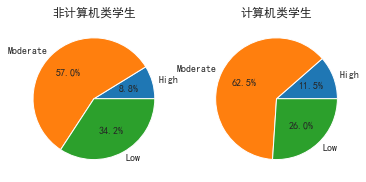

In [58]:
plt.subplot(121)
no = [IT_Adapt['No']['High'], IT_Adapt['No']['Moderate'], IT_Adapt['No']['Low']]
plt.pie(no, labels=Order, autopct='%1.1f%%')
plt.title("非计算机类学生")


plt.subplot(122)
yes = [IT_Adapt['Yes']['High'], IT_Adapt['Yes']['Moderate'], IT_Adapt['Yes']['Low']]
plt.pie(yes, labels=Order, autopct='%1.1f%%')
plt.title("计算机类学生")

plt.show()

居住地点

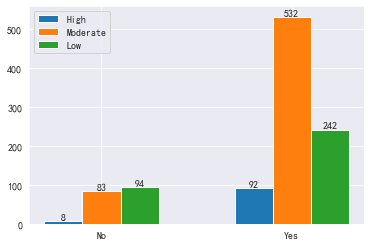

In [59]:
high = [Location_Adapt['No']['High'], Location_Adapt['Yes']['High']]
moderate = [Location_Adapt['No']['Moderate'], Location_Adapt['Yes']['Moderate']]
low = [Location_Adapt['No']['Low'], Location_Adapt['Yes']['Low']]


count = Town.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x + width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i] + width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x + 2 * width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i] + 2 * width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x + width, labels=location)
plt.legend()
plt.show()

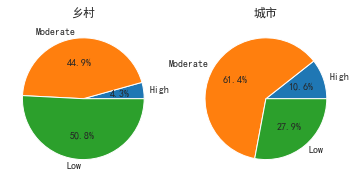

In [60]:
plt.subplot(121)
no = [Location_Adapt['No']['High'], Location_Adapt['No']['Moderate'], Location_Adapt['No']['Low']]
plt.pie(no, labels=Order, autopct='%1.1f%%')
plt.title("乡村")


plt.subplot(122)
yes = [Location_Adapt['Yes']['High'], Location_Adapt['Yes']['Moderate'], Location_Adapt['Yes']['Low']]
plt.pie(yes, labels=Order, autopct='%1.1f%%')
plt.title("城市")

plt.show()

经济状况

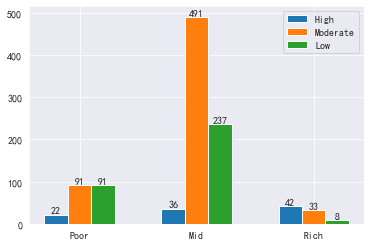

In [61]:
high = [Finance_Adapt['Poor']['High'], Finance_Adapt['Mid']['High'], Finance_Adapt['Rich']['High']]
moderate = [Finance_Adapt['Poor']['Moderate'], Finance_Adapt['Mid']['Moderate'], Finance_Adapt['Rich']['Moderate']]
low = [Finance_Adapt['Poor']['Low'], Finance_Adapt['Mid']['Low'], Finance_Adapt['Rich']['Low']]


count = Finance.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=finance)
plt.legend()
plt.show()

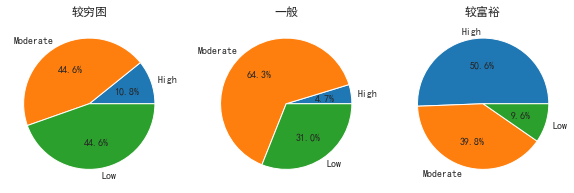

In [62]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
poor = [Finance_Adapt['Poor']['High'], Finance_Adapt['Poor']['Moderate'], Finance_Adapt['Poor']['Low']]
plt.pie(poor, labels=Order, autopct='%1.1f%%')
plt.title("较穷困")


plt.subplot(132)
mid = [Finance_Adapt['Mid']['High'], Finance_Adapt['Mid']['Moderate'], Finance_Adapt['Mid']['Low']]
plt.pie(mid, labels=Order, autopct='%1.1f%%')
plt.title("一般")


plt.subplot(133)
rich = [Finance_Adapt['Rich']['High'], Finance_Adapt['Rich']['Moderate'], Finance_Adapt['Rich']['Low']]
plt.pie(rich, labels=Order, autopct='%1.1f%%')
plt.title("较富裕")
plt.show()

网络类型

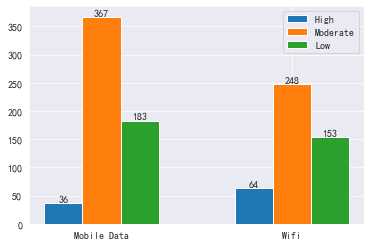

In [63]:
high = [Internet_Adapt['Mobile Data']['High'], Internet_Adapt['Wifi']['High']]
moderate = [Internet_Adapt['Mobile Data']['Moderate'], Internet_Adapt['Wifi']['Moderate']]
low = [Internet_Adapt['Mobile Data']['Low'], Internet_Adapt['Wifi']['Low']]


count = Internet.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x + width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i] + width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x + 2 * width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i] + 2 * width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x + width, labels=internet)
plt.legend()
plt.show()

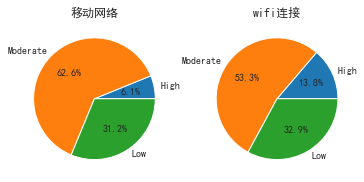

In [64]:
plt.subplot(121)
mobile = [Internet_Adapt['Mobile Data']['High'], Internet_Adapt['Mobile Data']['Moderate'], Internet_Adapt['Mobile Data']['Low']]
plt.pie(mobile, labels=Order, autopct='%1.1f%%')
plt.title("移动网络")


plt.subplot(122)
wifi = [Internet_Adapt['Wifi']['High'], Internet_Adapt['Wifi']['Moderate'], Internet_Adapt['Wifi']['Low']]
plt.pie(wifi, labels=Order, autopct='%1.1f%%')
plt.title("wifi连接")

plt.show()

网络优劣

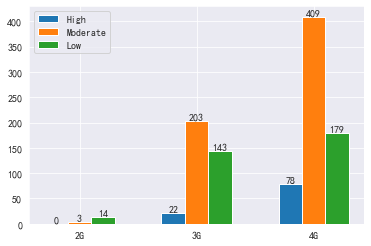

In [65]:
high = [0, Network_Adapt['3G']['High'], Network_Adapt['4G']['High']]
moderate = [Network_Adapt['2G']['Moderate'], Network_Adapt['3G']['Moderate'], Network_Adapt['4G']['Moderate']]
low = [Network_Adapt['2G']['Low'], Network_Adapt['3G']['Low'], Network_Adapt['4G']['Low']]


count = Network.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=network)
plt.legend()
plt.show()

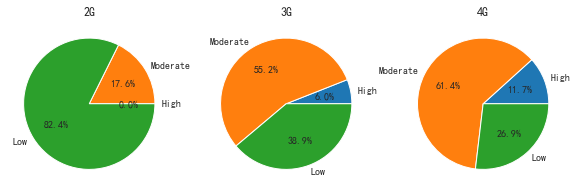

In [66]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
g2 = [0, Network_Adapt['2G']['Moderate'], Network_Adapt['2G']['Low']]
plt.pie(g2, labels=Order, autopct='%1.1f%%')
plt.title("2G")


plt.subplot(132)
g3 = [Network_Adapt['3G']['High'], Network_Adapt['3G']['Moderate'], Network_Adapt['3G']['Low']]
plt.pie(g3, labels=Order, autopct='%1.1f%%')
plt.title("3G")


plt.subplot(133)
g4 = [Network_Adapt['4G']['High'], Network_Adapt['4G']['Moderate'], Network_Adapt['4G']['Low']]
plt.pie(g4, labels=Order, autopct='%1.1f%%')
plt.title("4G")
plt.show()

课程时长

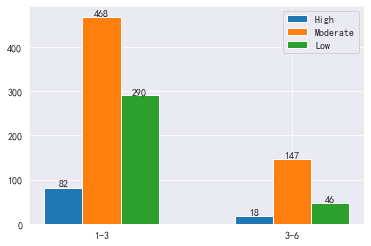

In [67]:
high = [Duration_Adapt['1-3']['High'], Duration_Adapt['3-6']['High']]
moderate = [Duration_Adapt['1-3']['Moderate'], Duration_Adapt['3-6']['Moderate']]
low = [Duration_Adapt['1-3']['Low'], Duration_Adapt['3-6']['Low']]


count = Duration.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=duration)
plt.legend()
plt.show()

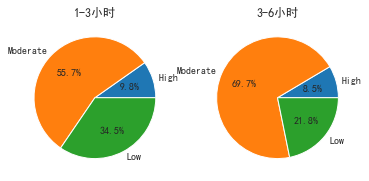

In [68]:
plt.subplot(121)
short = [Duration_Adapt['1-3']['High'], Duration_Adapt['1-3']['Moderate'], Duration_Adapt['1-3']['Low']]
plt.pie(short, labels=Order, autopct='%1.1f%%')
plt.title("1-3小时")


plt.subplot(122)
long = [Duration_Adapt['3-6']['High'], Duration_Adapt['3-6']['Moderate'], Duration_Adapt['3-6']['Low']]
plt.pie(long, labels=Order, autopct='%1.1f%%')
plt.title("3-6小时")

plt.show()

是否有学习系统

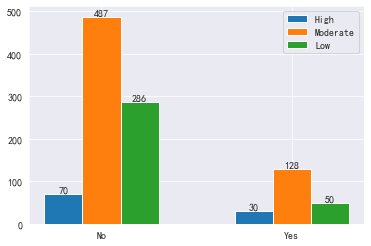

In [69]:
high = [LMS_Adapt['No']['High'], LMS_Adapt['Yes']['High']]
moderate = [LMS_Adapt['No']['Moderate'], LMS_Adapt['Yes']['Moderate']]
low = [LMS_Adapt['No']['Low'], LMS_Adapt['Yes']['Low']]


count = Internet.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x + width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i] + width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x + 2 * width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i] + 2 * width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x + width, labels=lms)
plt.legend()
plt.show()

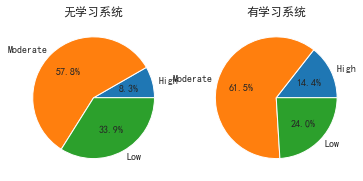

In [70]:
plt.subplot(121)
no = [LMS_Adapt['No']['High'], LMS_Adapt['No']['Moderate'], LMS_Adapt['No']['Low']]
plt.pie(no, labels=Order, autopct='%1.1f%%')
plt.title("无学习系统")


plt.subplot(122)
yes = [LMS_Adapt['Yes']['High'], LMS_Adapt['Yes']['Moderate'], LMS_Adapt['Yes']['Low']]
plt.pie(yes, labels=Order, autopct='%1.1f%%')
plt.title("有学习系统")

plt.show()

偏好设备

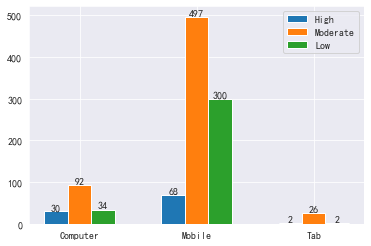

In [71]:
high = [Device_Adapt['Computer']['High'], Device_Adapt['Mobile']['High'], Device_Adapt['Tab']['High']]
moderate = [Device_Adapt['Computer']['Moderate'], Device_Adapt['Mobile']['Moderate'], Device_Adapt['Tab']['Moderate']]
low = [Device_Adapt['Computer']['Low'], Device_Adapt['Mobile']['Low'], Device_Adapt['Tab']['Low']]


count = Finance.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=device)
plt.legend()
plt.show()

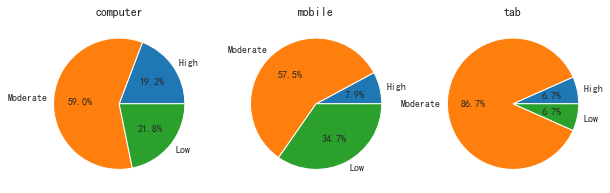

In [72]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
computer = [Device_Adapt['Computer']['High'], Device_Adapt['Computer']['Moderate'], Device_Adapt['Computer']['Low']]
plt.pie(computer, labels=Order, autopct='%1.1f%%')
plt.title("computer")


plt.subplot(132)
mobile = [Device_Adapt['Mobile']['High'], Device_Adapt['Mobile']['Moderate'], Device_Adapt['Mobile']['Low']]
plt.pie(mobile, labels=Order, autopct='%1.1f%%')
plt.title("mobile")


plt.subplot(133)
tab = [Device_Adapt['Tab']['High'], Device_Adapt['Tab']['Moderate'], Device_Adapt['Tab']['Low']]
plt.pie(tab, labels=Order, autopct='%1.1f%%')
plt.title("tab")
plt.show()